# Data Structure

In [1]:
import numpy as np

In [2]:
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6],
              [6, 7],
              [7, 9]])

In [4]:
labels = np.array([0, 1, 2, 0, 1, 2, 0])

In [5]:
cluster_centers = np.array([[1, 2],
                            [2, 2],
                            [3, 3]])

In [6]:
p = X[:, :, np.newaxis]
q = cluster_centers.T[np.newaxis, :, :]
r = (p - q)**2
s = r.sum(axis=1)

In [15]:
print(p.shape)
print(q.shape)
print(r.shape)
print(s.shape)

(7, 2, 1)
(1, 2, 3)
(7, 2, 3)
(7, 3)


# K-means

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self, n_clusters, max_iter=1000, random_seed=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        # アルゴリズム内で乱数を指定しているため，それをseedで固定している
        self.random_state = np.random.RandomState(random_seed)
        
    def fit(self, X):
        # 所属するクラスタの初期値を設定
        cycle = itertools.cycle(range(self.n_clusters))
        self.labels_ = np.fromiter(itertools.islice(cycle, X.shape[0]), dtype=np.int)
        self.random_state.shuffle(self.labels_)
        
        labels_prev = np.zeros(X.shape[0])
        count = 0
        self.cluster_centers_ = np.zeros((self.n_clusters, X.shape[1]))
        
        # main iteration
        while (not (self.labels_ == labels_prev).all()
                    and count < self.max_iter):

            # 全クラスタについて以下の計算を実行
            for i in range(self.n_clusters):
                # クラスタ中心を計算
                XX = X[self.labels_ == i, :]
                self.cluster_centers_[i, :] = XX.mean(axis=0)
                
            # 各点とクラスタ中心の距離を計算 
            dist = ((X[:, :, np.newaxis]
                     - self.cluster_centers_.T[np.newaxis, :, :])
                    ** 2).sum(axis=1)
            labels_prev = self.labels_
            self.labels_ = dist.argmin(axis=1)
            count += 1
            
    def predict(self, X):
        dist = ((X[:, :, np.axis]
                 - self.cluster_centers_.T[np.newaxis, :, :])
                ** 2).sum(axis=1)
        self.labels_ = dist.argmin(axis=1)
        return labels

In [3]:
def flatten(nested_list):
    """2重のリストをフラットにする関数"""
    return [e for inner_list in nested_list for e in inner_list]
#ex: color = flatten([['r', 'g', 'b', 'c', 'm', 'y'] for _ in range(100)])

In [45]:
def kmeans_classify(num_clusters, num_data=50, dims=2, seed=0):
    # create the random data for training
    points = []
    for c in range(num_clusters):
        rand = np.random.randn(dims) * num_clusters * 2
        points.append(np.random.randn(num_data, dims) + rand)
    points = np.concatenate(points, axis=0)
    np.random.shuffle(points)
    
    # define the model and training
    model = KMeans(num_clusters)
    model.fit(points)

    # visualiation
    if dims == 2:
        markers = flatten([['+', '*', 'o', '.', 'x', 'p', 'v', '^', '<', '>', 's'] for _ in range(100)])
        markers = markers[:num_clusters]

        for idx, marker in enumerate(markers):
            p = points[model.labels_ == idx, :]
            plt.scatter(p[:, 0], p[:, 1], color='k', marker=marker)

        plt.show()

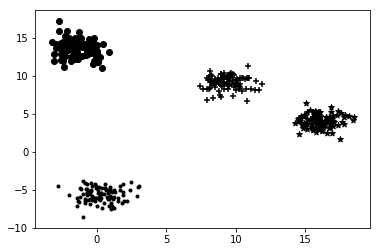

In [50]:
kmeans_classify(4, 100)